In [1]:
library(data.table)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
transpose(): purrr, data.table


In [2]:
dir()

[1] "Book1.xlsx"                 "Book2.xlsx"                
[3] "ContosoSales.accdb"         "Lesson_03_Milestone.docx"  
[5] "MFG_DEFECT_DATA.csv"        "Milestone 3 exercise.ipynb"
[7] "PRODUCT_NAMES.csv"          "ProductCategories.accdb"   
[9] "RETURNS_DATA.csv"

In [3]:
MFG_DEFECT_DATA <- fread('MFG_DEFECT_DATA.csv')
RETURNS_DATA <- fread('RETURNS_DATA.csv')

In [4]:
glimpse(RETURNS_DATA)

Observations: 3,655
Variables: 4
$ MFG_DATE         <chr> "1/1/16", "1/2/16", "1/3/16", "1/4/16", "1/5/16", ...
$ PLANT_ID         <chr> "US1", "US1", "US1", "US1", "US1", "US1", "US1", "...
$ PRODUCT_ID       <chr> "LAP01", "LAP01", "LAP01", "LAP01", "LAP01", "LAP0...
$ RETURNS_RECEIVED <int> 7, 8, 4, 5, 5, 6, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 5,...


In [5]:
glimpse(MFG_DEFECT_DATA)

Observations: 3,655
Variables: 6
$ MFG_DATE        <chr> "1/1/16", "1/2/16", "1/3/16", "1/4/16", "1/5/16", "...
$ PLANT_ID        <chr> "US1", "US1", "US1", "US1", "US1", "US1", "US1", "U...
$ PRODUCT_ID      <chr> "LAP01", "LAP01", "LAP01", "LAP01", "LAP01", "LAP01...
$ ITEMS_PRODUCED  <int> 49930, 49990, 50070, 49980, 50060, 50060, 50000, 49...
$ ITEMS_SAMPLED   <int> 650, 730, 370, 500, 450, 580, 470, 550, 550, 410, 4...
$ ITEMS_DEFECTIVE <int> 12, 13, 7, 9, 8, 10, 8, 10, 10, 7, 8, 10, 8, 8, 10,...


In [17]:
# Convert dataframes to data.table
MFG_DEFECT_DATA <- as.data.table(MFG_DEFECT_DATA)
RETURNS_DATA <- as.data.table(RETURNS_DATA)

In [18]:
# add a new column to MFG_DEFECT_DATA called MFG_DEFECT_RATE where MFG_DEFECT_RATE = ITEMS_DEFECTIVE/ITEMS_SAMPLED
MFG_DEFECT_DATA[, MFG_DEFECT_RATE := ITEMS_DEFECTIVE/ITEMS_SAMPLED, ]

In [19]:
# MFG_DATE column is currently in character format. Convert it to a Date format in both data sets.
MFG_DEFECT_DATA$MFG_DATE <- as.Date(MFG_DEFECT_DATA$MFG_DATE, "%m/%d/%y")
RETURNS_DATA$MFG_DATE <- as.Date(RETURNS_DATA$MFG_DATE, "%m/%d/%y")


In [56]:
# Export data into CSV format
write.csv(MFG_DEFECT_DATA, "new_MFG_DEFECT_DATA.csv", row.names = FALSE)
write.csv(RETURNS_DATA, "new_RETURNS_DATA.csv", row.names = FALSE)

In [24]:
# Without using the "by" clause, join is on all fields, which is what we want here
JOINED_DATA <- inner_join(MFG_DEFECT_DATA, RETURNS_DATA)

Joining, by = c("MFG_DATE", "PLANT_ID", "PRODUCT_ID")


In [26]:
JOINED_DATA %>% head(4)

MFG_DATE,PLANT_ID,PRODUCT_ID,ITEMS_PRODUCED,ITEMS_SAMPLED,ITEMS_DEFECTIVE,MFG_DEFECT_RATE,RETURNS_RECEIVED
2016-01-01,US1,LAP01,49930,650,12,0.01846154,7
2016-01-02,US1,LAP01,49990,730,13,0.01780822,8
2016-01-03,US1,LAP01,50070,370,7,0.01891892,4
2016-01-04,US1,LAP01,49980,500,9,0.01800000,5


In [39]:
# Filter date range to just 2017
final_data <- filter(JOINED_DATA, MFG_DATE >= '2017-01-01' & MFG_DATE <= '2017-12-31')

In [59]:
final_data %>% head(5)

MFG_DATE,PLANT_ID,PRODUCT_ID,ITEMS_PRODUCED,ITEMS_SAMPLED,ITEMS_DEFECTIVE,MFG_DEFECT_RATE,RETURNS_RECEIVED
2017-01-01,US1,LAP01,50050,380,7,0.01842105,4
2017-01-02,US1,LAP01,49980,660,12,0.01818182,7
2017-01-03,US1,LAP01,49930,640,12,0.01875000,7
2017-01-04,US1,LAP01,49940,450,8,0.01777778,5
2017-01-05,US1,LAP01,49940,500,9,0.01800000,5


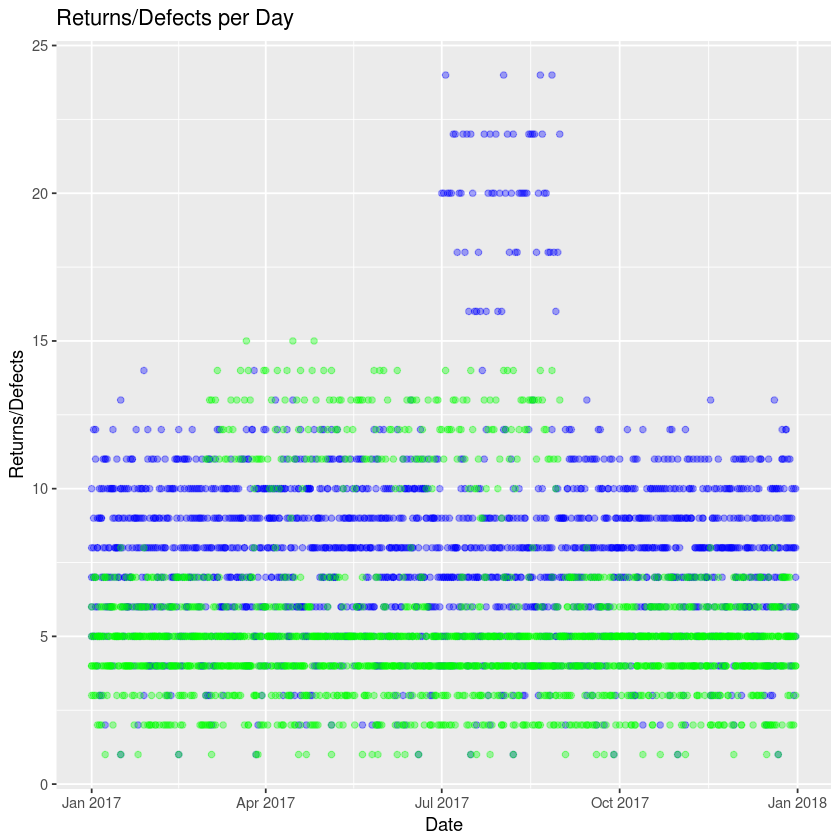

In [57]:
ggplot(data = final_data, mapping = aes(x = MFG_DATE)) +
   geom_point(alpha = .35, aes(y = ITEMS_DEFECTIVE), colour="blue") +
   geom_point(alpha = .35, aes(y = RETURNS_RECEIVED), colour="green") +
   xlab("Date") +
   ylab("Returns/Defects") +
   ggtitle("Returns/Defects per Day")

In [58]:
dir()

[1] "Book1.xlsx"                 "Book2.xlsx"                
 [3] "ContosoSales.accdb"         "Lesson_03_Milestone.docx"  
 [5] "MFG_DEFECT_DATA.csv"        "Milestone 3 exercise.ipynb"
 [7] "new_MFG_DEFECT_DATA.csv"    "new_RETURNS_DATA.csv"      
 [9] "PRODUCT_NAMES.csv"          "ProductCategories.accdb"   
[11] "RETURNS_DATA.csv"           "RETURNS_DATA.csv~"